In [213]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
aww = pd.read_csv('data/aww_posts.csv',index_col=[0])
earthporn = pd.read_csv('data/earthporn_posts.csv',index_col=[0])
braincels = pd.read_csv('data/braincels_posts.csv',index_col=[0])
incels = pd.read_csv('data/incels_posts.csv',index_col=[0])

In [215]:
df = pd.concat((aww,earthporn,braincels,incels))

In [216]:
df['controversial'] = df.apply(lambda x: 1 if (x['subreddit'] in ['Braincels','Incels']) else 0, axis=1)
df['author_banned'] = df.apply(lambda x: 1 if x['author'] == '[deleted]' else 0, axis=1)
df['title_len'] = df.apply(lambda x: 0 if x['title']=='[no_text]' else len(x['title']),axis=1)
df['post_len'] = df.apply(lambda x: 0 if x['selftext']=='[no_text]' else len(x['selftext']),axis=1)

df['post_neutral'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'neutral' in x['sentiment_post']) else 0, axis=1)
df['post_surprise'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'surprise' in x['sentiment_post']) else 0, axis=1)
df['post_disgust'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'disgust' in x['sentiment_post']) else 0, axis=1)
df['post_anger'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'anger' in x['sentiment_post']) else 0, axis=1)
df['post_joy'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'joy' in x['sentiment_post']) else 0, axis=1)
df['post_fear'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'fear' in x['sentiment_post']) else 0, axis=1)
df['post_sadness'] = df.apply(lambda x: 1 if (x['sentiment_post']!='no_sentiment' and 'sadness' in x['sentiment_post']) else 0, axis=1)

df['title_neutral'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'neutral' in x['sentiment_title']) else 0, axis=1)
df['title_surprise'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'surprise' in x['sentiment_title']) else 0, axis=1)
df['title_disgust'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'disgust' in x['sentiment_title']) else 0, axis=1)
df['title_anger'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'anger' in x['sentiment_title']) else 0, axis=1)
df['title_joy'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'joy' in x['sentiment_title']) else 0, axis=1)
df['title_fear'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'fear' in x['sentiment_title']) else 0, axis=1)
df['title_sadness'] = df.apply(lambda x: 1 if (x['sentiment_title']!='no_sentiment' and 'sadness' in x['sentiment_title']) else 0, axis=1)

df = df.reset_index()
df = df.drop(['index','subreddit','author','url','title','selftext','id','sentiment_post','sentiment_title'],axis=1)


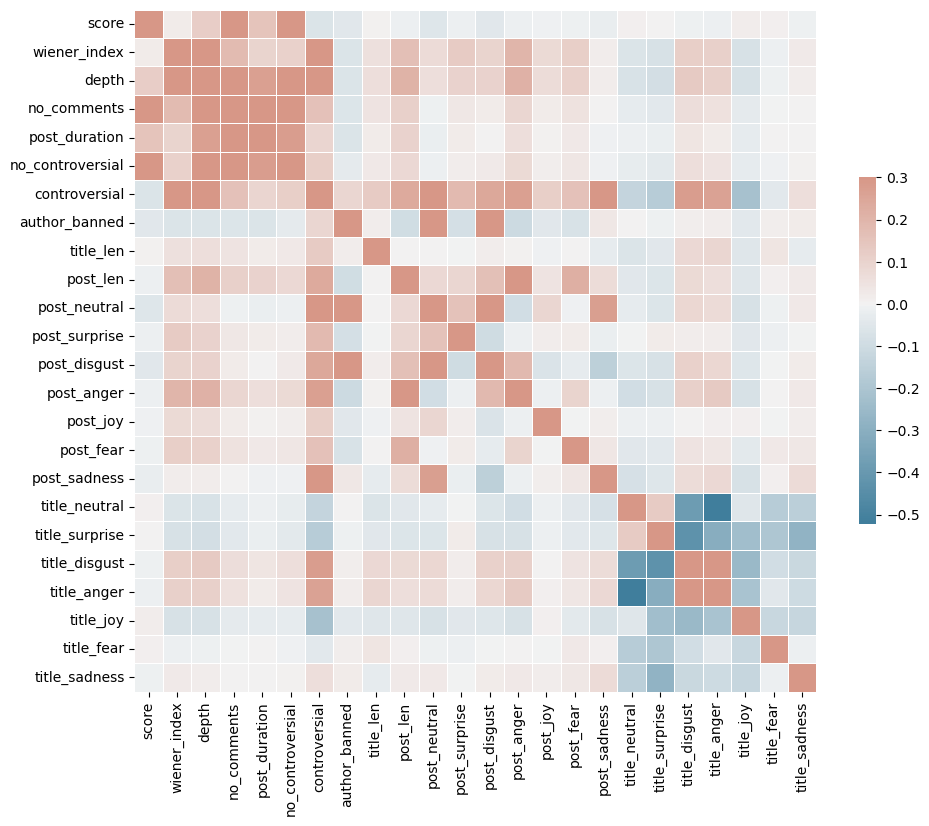

In [218]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [219]:
val = pd.concat((df[df['controversial']==1].sample(1000, random_state=44),df[df['controversial']==0].sample(1000, random_state=44)))

In [220]:
train = df.drop(val.index)

In [221]:
train_y = train['controversial']
train_X = train.drop(['controversial'],axis=1)
val_y = val['controversial']
val_X = val.drop(['controversial'],axis=1)

In [362]:
model = RandomForestClassifier(n_estimators=130,max_depth=11,min_samples_split=3)
model.fit(train_X,train_y)

RandomForestClassifier(max_depth=11, min_samples_split=3, n_estimators=130)

In [363]:
train_pred = model.predict(train_X)

In [364]:
accuracy_score(train_y,train_pred)

0.9115526315789474

In [365]:
pred = model.predict(val_X)

In [366]:
accuracy_score(val_y,pred)

0.906

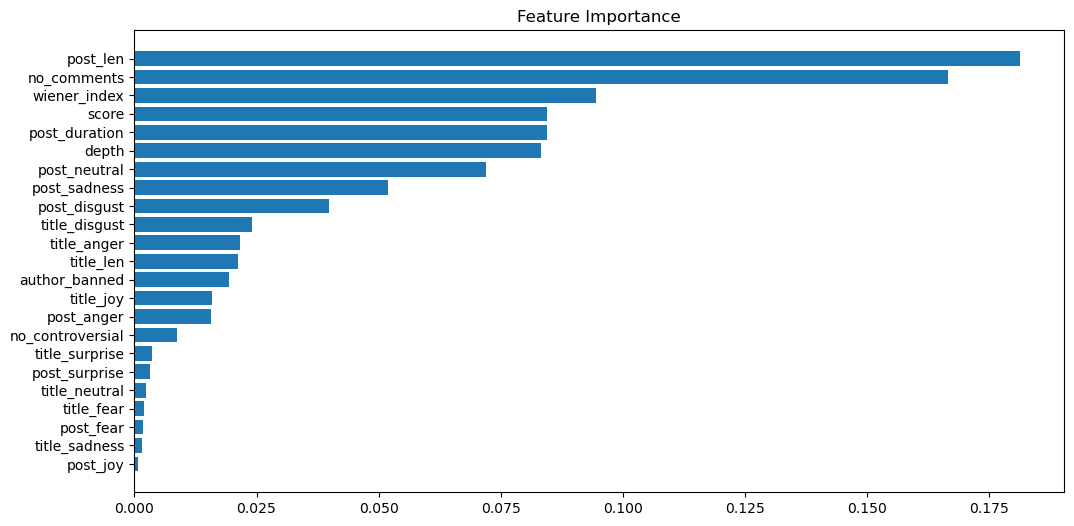

In [367]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()